In [1]:
import PlotBands as PBands
import read_wann_calc as reading### this file contains all the necessary function for reading the inputs files


import numpy as np
import matplotlib.pyplot as plt

In [62]:
###Number of k points in the grid, each input file is labed with the number of k-points in each direction
###In this case we have use a delta of 0.1 in each direction.

nx = 128
ny = 128
nz = 1
punto = [0.0,0.0,0.0]

delta = 0.1
kxr=[punto[0]-delta,punto[0]+delta]
kyr=[punto[1]-delta,punto[1]+delta]
kzr=[punto[2]-delta,punto[2]+delta]

In [63]:
system='BlackP/'
file='./out/BlackP_grid_list_nk'+str(nx)+'x'+str(ny)+'x'+str(nz)+'_wann_calc.h5'
Bands          = reading.ReadBands(file)
Quantum_Metric = reading.ReadMetric(file)
Velocity       = reading.ReadVelocity(file)

In [15]:
Velocity.reshape(nx,ny,nz,3,32,32);

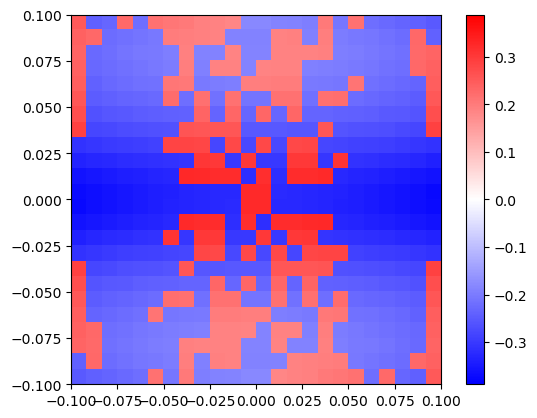

In [17]:
#datos = Velocity.reshape(nx,ny,nz,3,32,32)

vk = np.reshape(Velocity[:,1,19,20], [nx,ny,nz])
phase =  np.unwrap(np.angle(vk))
vk_new = np.abs(vk) * np.exp(1j * phase)

vmax = np.amax(np.abs(vk))

mapa_k = plt.imshow(np.imag(vk[:,:,nz//2]), extent=(kxr[0],kxr[-1],kyr[0],kyr[-1]), vmin=-vmax, vmax=vmax, cmap='bwr')
plt.colorbar(mapa_k)

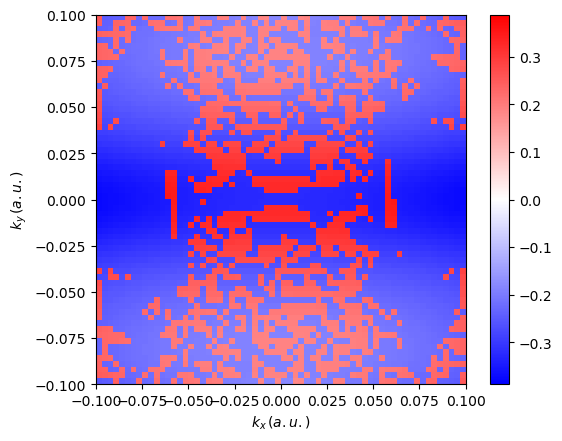

In [36]:
#datos = Velocity.reshape(nx,ny,nz,3,32,32)

vk = np.reshape(Velocity[:,1,19,20], [nx,ny,nz])
phase =  np.unwrap(np.angle(vk))
vk_new = np.abs(vk) * np.exp(1j * phase)

vmax = np.amax(np.abs(vk))

mapa_k = plt.imshow(np.imag(vk[:,:,nz//2]), extent=(kxr[0],kxr[-1],kyr[0],kyr[-1]), vmin=-vmax, vmax=vmax, cmap='bwr')
plt.xlabel(r"$k_x\, (a.u.)$")
plt.ylabel(r"$k_y\, (a.u.)$")
plt.colorbar(mapa_k)

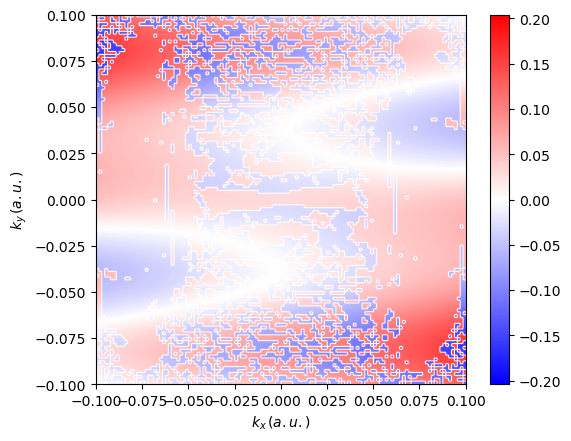

In [64]:
#datos = Velocity.reshape(nx,ny,nz,3,32,32)

vk = np.reshape(Velocity[:,0,19,20], [nx,ny,nz])
phase =  np.unwrap(np.angle(vk))
vk_new = np.abs(vk) * np.exp(1j * phase)

vmax = np.amax(np.abs(vk))

mapa_k = plt.imshow(np.imag(vk[:,:,nz//2]), extent=(kxr[0],kxr[-1],kyr[0],kyr[-1]), vmin=-vmax, vmax=vmax, cmap='bwr')
plt.xlabel(r"$k_x\, (a.u.)$")
plt.ylabel(r"$k_y\, (a.u.)$")
plt.colorbar(mapa_k)

### Energy of the Valence and Conduction Band

Text(0, 0.5, '$k_y\\, (a.u.)$')

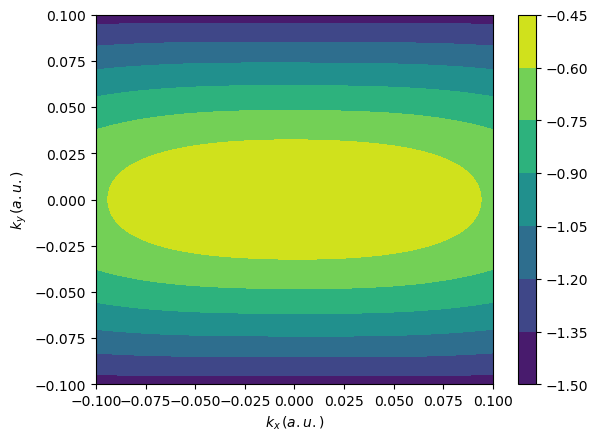

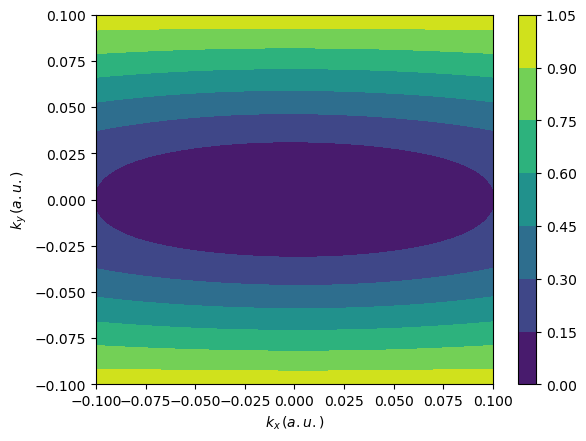

In [73]:
E_valence    = Bands[:,19].reshape((nx,ny,nz))
E_conduction = Bands[:,20].reshape((nx,ny,nz))


plt.figure()
mapa_k=plt.contourf(E_valence[:,:,nz//2]*27.2, extent=(kxr[0],kxr[-1],kyr[0],kyr[-1]))
plt.colorbar(mapa_k)
plt.xlabel(r"$k_x\, (a.u.)$")
plt.ylabel(r"$k_y\, (a.u.)$")

plt.figure()
mapa_k=plt.contourf(E_conduction[:,:,nz//2]*27.2, extent=(kxr[0],kxr[-1],kyr[0],kyr[-1]))
plt.colorbar(mapa_k)
plt.xlabel(r"$k_x\, (a.u.)$")
plt.ylabel(r"$k_y\, (a.u.)$")

### Quantum Metric

Text(0, 0.5, '$k_y\\, (a.u.)$')

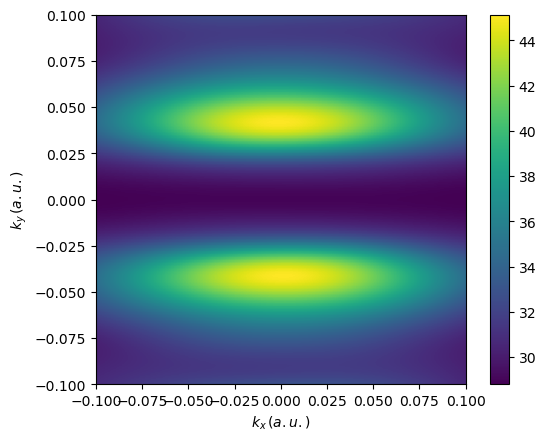

In [70]:
gxx=Quantum_Metric[:,0,0,19].reshape((nx,ny,nz))
gyy=Quantum_Metric[:,1,1,19].reshape((nx,ny,nz))
gzz=Quantum_Metric[:,2,2,19].reshape((nx,ny,nz))
gxy=Quantum_Metric[:,0,1,19].reshape((nx,ny,nz))
gxz=Quantum_Metric[:,0,2,19].reshape((nx,ny,nz))
gyz=Quantum_Metric[:,1,2,19].reshape((nx,ny,nz))


mapa_k=plt.imshow(gzz[:,:,nz//2], extent=(kxr[0],kxr[-1],kyr[0],kyr[-1]))
plt.colorbar(mapa_k)
plt.xlabel(r"$k_x\, (a.u.)$")
plt.ylabel(r"$k_y\, (a.u.)$")